# 비용함수 cost function그리기

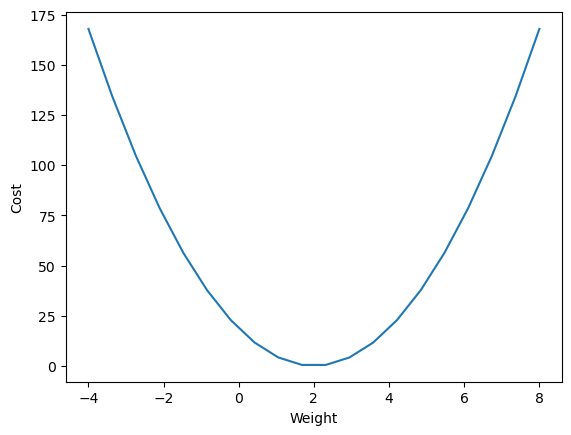

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def MSE(w, x, y, b): #함수만들기
    s = 0
    for i in range(len(x)):
        s += (y[i] - (w*x[i]+b))**2
    return s/len(x)
#y[i] : 정답 - w*x[i]+b:오차값 의 제곱

# y = 2x + 0.1 모델 가정
x = [1.,2.,3.] # 입력변수, 독립변수, Feature (특성값)
y = [2.1,4.1,6.1] # 출력변수, 종속변수, label(정답)

b = 0.1

w_val = [] # 비용함수 그래프의 x축의 값
cost_val= [] # 비용함수 그래프의 y축의 값

for w in np.linspace(-4,8,20): #-4부터 8까지의 구간 20개의 점, 함수 답으로 그래프 그리기
    c = MSE(w,x,y,b)
    w_val.append(w)
    cost_val.append(c)

plt.plot(w_val,cost_val)
plt.xlabel('Weight')
plt.ylabel('Cost')
plt.show()

# 가중치 학습

In [5]:
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

-0.09027529589850945 0.17055522598064407


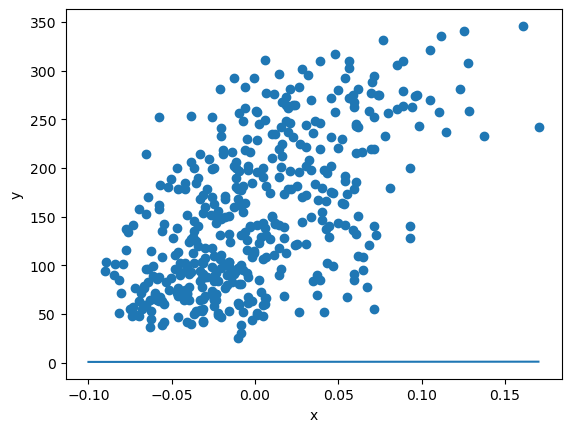

In [8]:
diabetes = load_diabetes() # 당뇨병 환자 데이터 로드
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
sr = pd.Series(diabetes.target) # 종속변수 : 베이스라인 1년 후 질병 진행의 정량적 측정 값

print(np.min(df['bmi']),np.max(df['bmi'])) # 최소 최대값을 회귀선 x 시작점으로 한다

# ** 초기 회귀선 그리기 1단계 **#
w = 1.0 # 초기가중치(임의의 값)
b = 1.0 # 초기절편(임의의 절편) 

pt1 = (-0.1, -0.1*w+b) # 회귀선의 시작점 (x,y) minx값
pt2 = (0.17, 0.15*w+b) # 회귀선의 끝점 (x,y) max x값

plt.plot([pt1[0],pt2[0]],[pt1[1],pt2[1]]) # plot ([x좌표리스트],[y좌표리스트])
plt.scatter(df['bmi'].values,sr.values)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

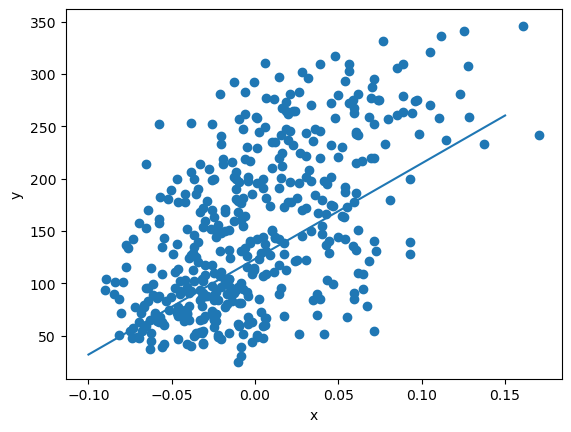

학습된 가중치:913.60
학습된 절편:123.394144


In [7]:
x = df['bmi']
y = diabetes.target

w = 1.0
b = 1.0
for i in range(100) : #100번 반복하여 학습
    for x_i, y_i in zip(x,y):
        y_hat = w * x_i + b #예측값
        w = w - (y_hat - y_i) * x_i # 새로운 가중치를 업데이트 시키는 식 
        b = b - (y_hat - y_i)

# 2번째 회귀선 그리기 (학습시키기)
pt1 = (-0.1, -0.1*w+b) # 회귀선의 시작점 (x,y) [0].[1]
pt2 = (0.15, 0.15*w+b) # 회귀선의 끝점 (x,y) [0]. [1]

plt.plot([pt1[0],pt2[0]],[pt1[1],pt2[1]]) # plot ([x좌표리스트],[y좌표리스트])
plt.scatter(df['bmi'].values,sr.values)
plt.xlabel('x')
plt.ylabel('y')
plt.show()
print(f'학습된 가중치:{w:.2f}')
print(f'학습된 절편:{b:2f}')

## scikit-learn을 이용한 회귀분석 비교
- scikit-learn : 머신러닝 알고리즘을 제공하는 패키지
- 공식사이트 : https://scikit-learn.org/stable

추정계수(가중치): 949.44
절편: 152.13


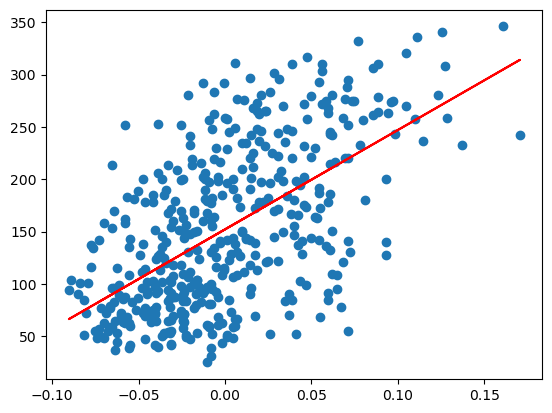

In [18]:
from sklearn.linear_model import LinearRegression # 회귀분석 모델 클래스

# ** 초기 회귀선 그리기 1단계 **#
w = 1.0 # 초기가중치(임의의 값)
b = 1.0 # 초기절편(임의의 절편

pt1 = (-0.1, -0.1*w+b) # 회귀선의 시작점 (x,y)
pt2 = (0.15, 0.15*w+b) # 회귀선의 끝점 (x,y)

plt.plot([pt1[0],pt2[0]],[pt1[1],pt2[1]]) # plot ([x좌표리스트],[y좌표리스트])
plt.scatter(df['bmi'].values,sr.values)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#열벡터만들어주기 피쳐하나만들기 목록만들기
x = df['bmi'].values.reshape(-1,1) # 1열 아무나 행
Y = diabetes.target

#선형회귀 모델 준비
model = LinearRegression()

# 학습(fitting)
model.fit(x,y) # y = wx +b
# 예측 
y_hat = model.predict(x)

print(f'추정계수(가중치): {model.coef_[0]:.2f}')
print(f'절편: {model.intercept_:.2f}')
plt.plot(x,y_hat,'r') # 학습된 회귀선
plt.scatter(x,y) #산점도
plt.show()

# Linear Regression 선형회귀

(70, 1) (30, 1) (70, 1) (30, 1)
MAE:1.31
RMSE:1.57
R-Square(결정계수):0.95
가중치:[[2.37097788]]
절편:[2.44867376]


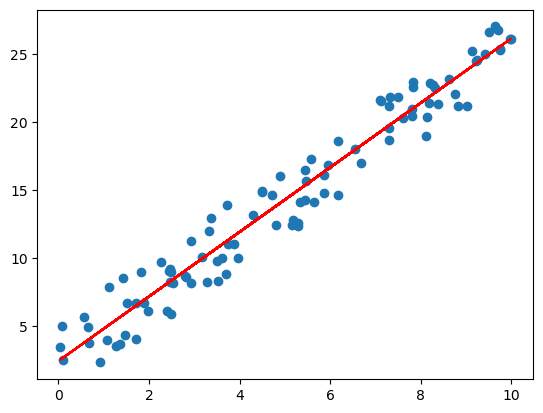

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split #학습과 평가를 분리
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1) 데이터 준비
x = np.random.rand(100,1) * 10  # [0,10) 범위의 100x1 모양의 행렬로 생성
y = (x*2.3) + np.random.rand(100,1) * 5.4 # y = 2.3x + 5.4 모형 가정

# 2 ) 모델 준비
model = LinearRegression()

# 3) 학습데이터와 평가데이터 분할
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

# 4) 학습 (Fitting)
model.fit(x_train,y_train)

#5) 예측 및 평가
y_hat = model.predict(x_test)
print(f'MAE:{mean_absolute_error(y_test, y_hat):.2f}')
print(f'RMSE:{np.sqrt(mean_squared_error(y_test, y_hat)):.2f}')
print(f'R-Square(결정계수):{r2_score(y_test, y_hat):.2f}')
print(f'가중치:{model.coef_}')
print(f'절편:{model.intercept_}')

#6) 예측결과 시각화
plt.scatter(x,y)
plt.plot(x,model.predict(x),'r')
plt.show()

[문제] 키와 몸무게 데이터를 이용해 모델을 학습 시킨 후, 키 170인 사람의 몸무게를 예측하는 프로그램을 작성하세요.

MAE:7.95
RMSE:9.19
R-Square(결정계수):0.11
가중치:[0.4928283]
절편:-13.099185281951222
[70.68162505]
70.25714285714285


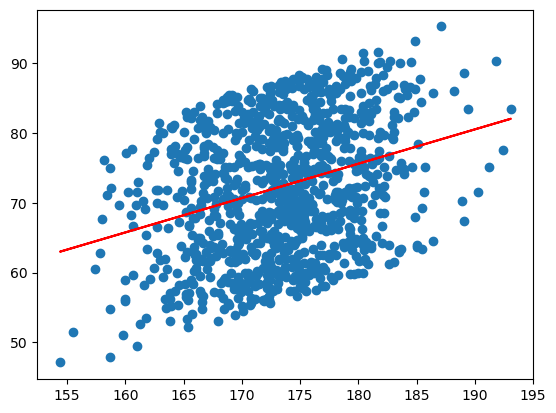

In [10]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

data = pd.read_csv('./데이터셋/body.csv')

x = data['Height'].values.reshape(-1,1)
y = data['Weight'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, train_size=0.7)
model = LinearRegression()
model.fit(x_train,y_train)

#5) 예측 및 평가
y_hat = model.predict(x_test)
print(f'MAE:{mean_absolute_error(y_test, y_hat):.2f}')
print(f'RMSE:{np.sqrt(mean_squared_error(y_test, y_hat)):.2f}')
print(f'R-Square(결정계수):{r2_score(y_test, y_hat):.2f}')
print(f'가중치:{model.coef_}')
print(f'절편:{model.intercept_}')
print(model.predict([[170]]))
print(data[data['Height']==170]['Weight'].mean())
data[data['Height'].between(169,171)]['Weight'].mean()
plt.scatter(x,y)
plt.plot(x,model.predict(x),'r')
plt.show()

# [실습] 캘리포니아 집값 예측
- 1990년 캘리포니아 블록 그룹마다의 주택 가격 데이터
- housing_median_age : 블록 내 주택 연령 중앙값
- total_rooms : 블록 내 주택의 총 방의 갯수
- total_bedrooms : 블록 내 주택의 총 침실 수
- population : 블록 내 거주중인 총 주민 수
- households : 블록 내 총 가구 수
- median_income : 블록 내 가구의 소득 중앙값
- median_house_value : 블록 내 가구의 주택 매매가 중앙값(종속변수)

In [ ]:
import warnings
warnings.filterwarnings(action='ignore')
import pandas as pd
from sklearn.linear_model import LinearRegression, SGDRegressor
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor

# 훈련 데이터 불러오기
train_data = pd.read_csv('./데이터셋/california_housing_train.csv')

# 사용할 특성들
features = ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']

# 특성 데이터와 타겟 데이터 설정
x_train = train_data[features]
y_train = train_data['median_house_value']

# 선형 회귀 모델 생성과 학습
model = RandomForestRegressor()
model.fit(x_train,y_train)

# 테스트 데이터 불러오기
test_data = pd.read_csv('./데이터셋/california_housing_test.csv')

# 테스트 데이터로 예측 수행
x_test = test_data[features]
y_test = test_data['median_house_value']

# R^2 점수 계산 및 출력
y_hat = model.predict(x_test)
print(f'R스퀘어:{r2_score(y_test,y_hat):.2f}')

# 예측값과 실제값 출력
sr_predict = pd.Series(np.round(y_hat[:10],2))
sr_actual = pd.Series(np.round(y_test[:10],2))

# 예측값과 실제값 비교 데이터프레임 생성 및 출력
print('예측값:',y_hat[:10])
print('실제값:',y_test[:10])
compare_df = pd.DataFrame({'Predict':sr_predict,'Actual':sr_actual})
display(compare_df)

# 예측값과 실제값의 분포 시각화
plt.figure(figsize=(10,5))
# kdeplot : 확률밀도그래프 -> 히스토그램과 유사하나 각 데이터의 구간별 빈도수를 확률적으로 추정하여 부드러운 곡선으로 표현한다.
sns.kdeplot(y_test,label='y',fill=True)
sns.kdeplot(y_hat,label='y_hat',fill=True)